In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import numpy as np

In [2]:
data = pd.read_csv('perpustakaan.csv')
data.head()

,Visitor,Gendre,Age,loan amount,book code
0,1,male,19,15,50
1,2,male,21,32,82
2,3,famale,20,41,6
3,4,famale,23,16,77
4,5,famale,31,60,40


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
berat_kiri     625 non-null int64
jarak_kiri     625 non-null int64
berat_kanan    625 non-null int64
jarak_kanan    625 non-null int64
seimbang       625 non-null object
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [3]:
zero_not_accepted = ['Visitor','Age','loan amount','book code']
# for col in zero_not_accepted:
#     for i in data[col]:
#         if i==0:
#             colSum = sum(data[col])
#             meanCol=colSum/len(data[col])
#             data[col]=meanCol

for col in zero_not_accepted:
    data[col]= data[col].replace(0,np.NaN)
    mean = int(data[col].mean(skipna=True))
    data[col] = data[col].replace(np.NaN,mean)

In [4]:
X = data.iloc[:,0:3]
y = data.iloc[:,3]
#Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age
#build model & train data
X = data[['Visitor','Age','loan amount','book code']]
y = data['Gendre']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)


In [6]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

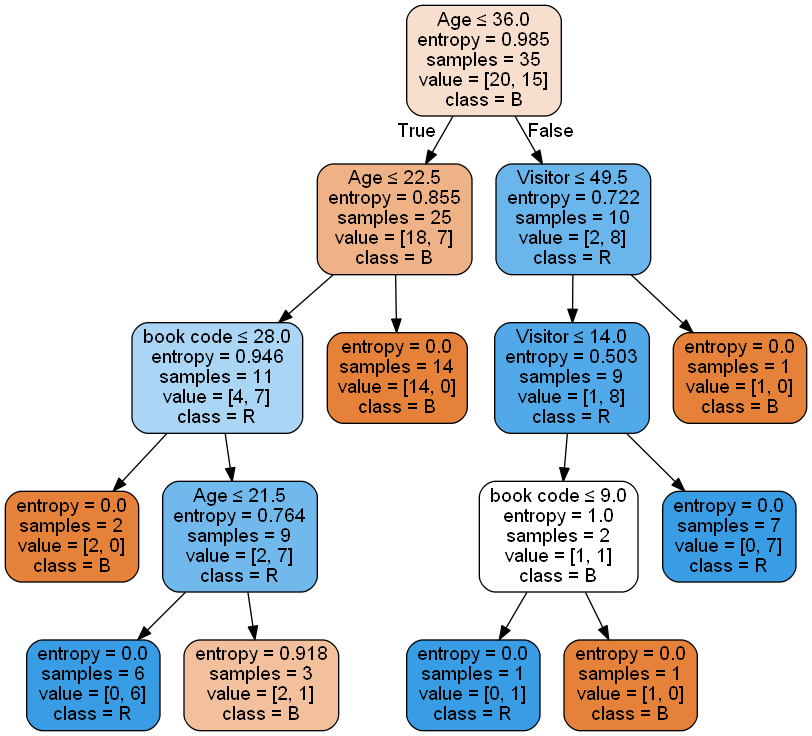

In [7]:
feature_cols = ['Visitor','Age','loan amount','book code']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['B','R','L'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('a.png')
Image(graph.create_png())